# Machine Learning Models for Predicting poverty levels
Author - Prajakta Gaydhani

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt    #for plotting graphs
import seaborn as sns              #for plotting graphs

from sklearn.pipeline import Pipeline             #imports a pipeline 
from sklearn.preprocessing import Imputer         #imputes missing values
from sklearn.preprocessing import StandardScaler  #normalized the data
from sklearn.decomposition import PCA             #import PCA for feature reduction

from sklearn.model_selection import train_test_split   #for splitting data in train and test set
from imblearn.under_sampling import RandomUnderSampler  #import undersampling technique under imblearn package
from imblearn.over_sampling import SMOTE               #import SMOTE technique under imblearn package
from sklearn.model_selection import GridSearchCV       #import grodsearchcv for finding most optimal hyper-parameters

from sklearn.naive_bayes import BernoulliNB                     #imports Naive Bayes 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier              #imports random forest classifier 
from sklearn.svm import LinearSVC                                #imports SVM

from sklearn.metrics import accuracy_score    #import accuracy
from sklearn.metrics import f1_score    #f1 score


#%matplotlib inline                 #inline plotiing
import warnings
warnings.filterwarnings("ignore")

# 1.  Read poverty data

In [2]:
#read data
data = pd.read_csv("final_cleaned_v1.csv")
data.shape

(9534, 120)

# 2. Drop Columns having > 0.95 correlation

In [3]:
#drop features having > 0.95 corr
data.drop(columns = ["walls", "roofs", "floor", "v18q1", "escolari/age", "escolari"], inplace = True)

In [4]:
data.shape

(9534, 114)

# 3. Impute missing values and rescale the dataset

In [5]:
#Normalized the dataset
def normalized_impute_missing(data):
    #Pipeline : Sequentially apply a list of transforms 
    #Fill the missing values using median
    # Normalize the data mean = 0 and variance = 1
    pipeline = Pipeline([('imputer', Imputer(strategy = 'median')), ('scaler', StandardScaler())])
    
    Target = data['Target_x']  #stores the target variable
    features = data.iloc[ : , 1:]  #stores all the features

    #apply the pipeline functions to the data
    transformed_data = pd.DataFrame(pipeline.fit_transform(features), columns=features.columns) 
    return transformed_data
    
transformed_data = normalized_impute_missing(data)

In [6]:
#separate target from features
features = transformed_data
target  = data['Target_x']

# 4. Check for the target class distribution 

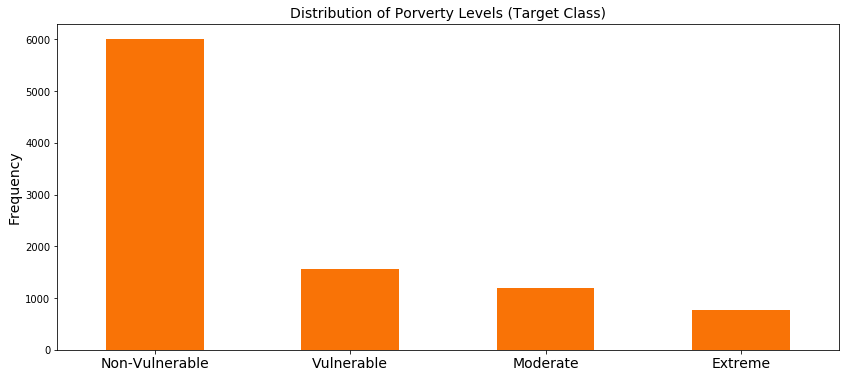

In [8]:
#check the target distribution
def target_distribution(target):
    #plot the frequency plot
    count_class = pd.value_counts(target)
    count_class.plot(kind = "bar", color = "xkcd:orange")
    plt.ylabel("Frequency", fontsize = 14)
    plt.xticks(np.arange(4), ('Non-Vulnerable', 'Vulnerable', 'Moderate', 'Extreme'), rotation = 360, fontsize = 14);
    plt.savefig('oversampling.png')
    plt.show();

    
plt.figure(figsize = (14, 6));
plt.title("Distribution of Porverty Levels (Target Class)", fontsize  = 14);
target_distribution(target);


# 5. Split the data into train and test datasets

In [9]:
#train test splitting 
def split_data(features, target):
    #split data into train and test set
    #train = 80, test = 20
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, shuffle = True)
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = split_data(features, target)

In [10]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7627, 113) (1907, 113) (7627,) (1907,)


# 6. Reduce the features using PCA

In [11]:
#Feature reduction using PCA
def featureReduction_PCA(X_train, X_test):
    # Make an instance of the Model
    n = []
    variance = []
    for i in range(2, 114):
        n.append(i)
    #print(len(n))
            
    for i in n:
        #print(i)
        pca = PCA(n_components = i)  #returns 90% variance 
        pca.fit(X_train)             #fit on training data
        temp_train = pca.transform(X_train)    #apply the trasnformations on train and test data
        temp_test = pca.transform(X_test)
        #print("No of Components reduced:" , pca.n_components_)
        variance.append(sum(pca.explained_variance_))
        #print("Explained variance : ", pca.explained_variance_)
        #return X_train, X_test
    return n, variance

#X_reduced_train, X_reduced_test = 
n, variance = featureReduction_PCA(X_train, X_test)

### 6.1 Plot the total variance reatined by different principal components of PCA

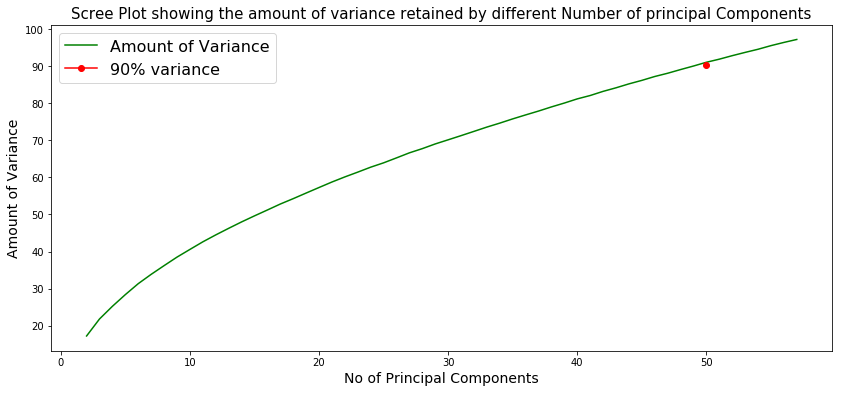

In [13]:
plt.figure(figsize = (14,6))
plt.plot(n[0:56], variance[0:56], 'g-', label = 'Amount of Variance');
plt.plot(50, 90.39, 'ro-', label = '90% variance')
plt.xlabel('No of Principal Components', fontsize = 14)
plt.ylabel('Amount of Variance', fontsize = 14);
plt.legend(loc = 'best', fontsize = 16)
plt.title("Scree Plot showing the amount of variance retained by different Number of principal Components", fontsize = 15);
plt.savefig("pca_variance_retained.png")




### 6.2 Feature reduction using PCA

In [14]:
def featureReduction_PCA(X_train, X_test):
    # Make an instance of the Model
        #print(i)
    pca = PCA(0.80)  #returns 90% variance 
    pca.fit(X_train)             #fit on training data
    temp_train = pca.transform(X_train)    #apply the trasnformations on train and test data
    temp_test = pca.transform(X_test)
    print("No of Components reduced:" , pca.n_components_)
    print("Explained variance : ", pca.explained_variance_)
    
        
        
    print("Explained variance : ", sum(pca.explained_variance_))
    #return X_train, X_test
    #return X_train, X_test
    return temp_train, temp_test

X_reduced_train, X_reduced_test = featureReduction_PCA(X_train, X_test)

No of Components reduced: 50
Explained variance :  [9.54792766 7.67263968 4.58205509 3.4214708  3.15028338 2.95303272
 2.51543263 2.34835211 2.29723756 2.07414645 2.05755889 1.96653844
 1.79663582 1.74532259 1.6664118  1.63800637 1.58845372 1.55038904
 1.52033029 1.49313884 1.43399241 1.41492582 1.35250605 1.32781102
 1.30591072 1.26243025 1.24804222 1.23279997 1.22498267 1.19461781
 1.16794886 1.13455658 1.11639996 1.10188504 1.0924673  1.08114491
 1.07624973 1.05852021 1.04946784 1.03813688 1.03088098 1.02178298
 1.0054573  0.99894054 0.98440015 0.97613427 0.9527133  0.95164214
 0.94071514 0.92486158]
Explained variance :  91.28768850549204


# 7. Balance the target class

### 7.1 Under-sampling

In [15]:
#Undersampling 
def under_sample(X_reduced_train, X_reduced_test,y_train, y_test):
    
    #performs undersampling on majority class
    #random state: controls randomization of algorithm 
    rs  = RandomUnderSampler(ratio = 'auto', random_state=42)
    #resample the data
    X_UnderSample, Y_UnderSample = rs.fit_sample(X_reduced_train,  y_train)
    #convert to numpy array
    undersampled_features= np.array(X_UnderSample)
    undersampled_labels = np.array(Y_UnderSample)
    
    return undersampled_features, undersampled_labels

undersampled_features, undersampled_labels = under_sample(X_reduced_train, X_reduced_test,y_train, y_test)

    

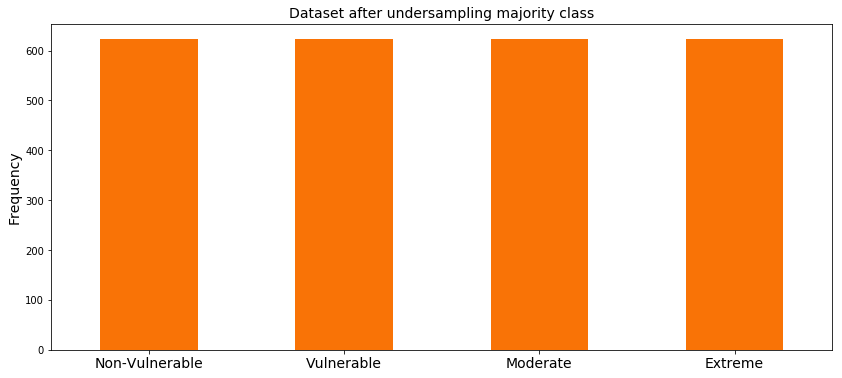

In [16]:
plt.figure(figsize = (14, 6));
plt.title("Dataset after undersampling majority class", fontsize = 14)
target_distribution(undersampled_labels)

### 7.2 Over-sampling using SMOTE analysis

In [17]:
#Synthetic Minority Over-sampling Technique
def smote_analysis(X_reduced_train, X_reduced_test,y_train, y_test):

    sm = SMOTE(random_state=42, kind='borderline1')
    #resample the data 
    X_SMOTE, Y_SMOTE = sm.fit_sample(X_reduced_train, y_train)
    #convert to numpy array
    smote_features = np.array(X_SMOTE)
    smote_labels = np.array(Y_SMOTE)
    return smote_features, smote_labels

smote_features, smote_labels = smote_analysis(X_reduced_train, X_reduced_test,y_train, y_test)

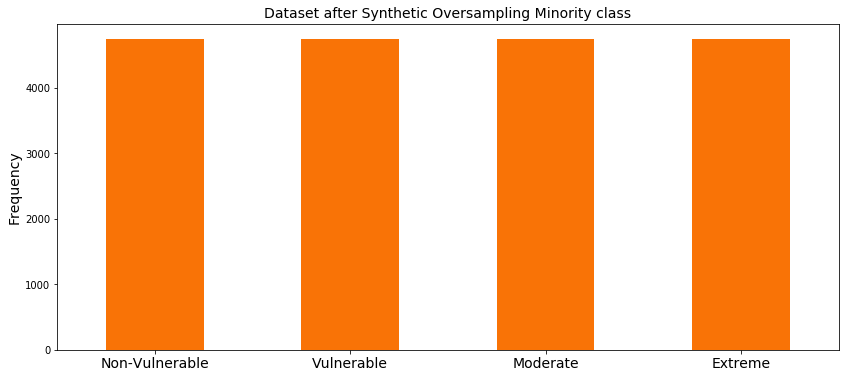

In [18]:
plt.figure(figsize = (14, 6))
plt.title("Dataset after Synthetic Oversampling Minority class", fontsize = 14)
target_distribution(smote_labels)

# 8. GridsearchCV for finding optimal hyper-parameters for different machine learning algorithms

In [21]:
#Grid search CV to find the most optimal hyper-parameter
def grid_search(model, param_grid, train_features, train_labels):
    #grid search to find the most optimal hyper-parameter for the model
    classifier = GridSearchCV(estimator = model, param_grid = param_grid, cv = 2, n_jobs = -1)
    classifier.fit(train_features, np.ravel(train_labels))
    return classifier.best_estimator_    

# 9. Implement Machine Learning models
Test for accuracy and f1-score

 ### 9.1.  Raw dataset

### Naive Bayes

In [23]:
#Naive Bayes 
def naive_bayes(train_features, train_lables):
    #alpha: laplace smoothing
    param_grid = {'alpha' : [0,1]}
    #create a obj for random forest classifer 
    nb = BernoulliNB()
    #call grid search function to find the most optimal parameters 
    raw_best_nb  = grid_search(nb,param_grid, train_features, train_lables)
    return raw_best_nb  #return most optimal features

raw_best_nb = naive_bayes(X_reduced_train, y_train)#

In [ ]:
raw_best_nb

In [24]:
#best hyper-parameters 
#nb = BernoulliNB(alpha=raw_best_nb.alpha)
nb = BernoulliNB(alpha = 1)
nb.fit(X_reduced_train, np.ravel(y_train))
pred_raw_nb = nb.predict(X_reduced_test)

In [27]:
print("Accuracy NB on raw data:", accuracy_score(y_test,pred_raw_nb)) #0.6471997902464604

In [28]:
print("f1-score NB on raw data:", f1_score(y_test,pred_raw_nb, average='macro'))   # 0.6677830064715351

### Random Forest

In [ ]:
def random_forest(train_features, train_lables):
    #n_estimators: no of trees in forest
    param_grid = {'max_depth': [5,6], 
                  'min_samples_leaf' : [5], 
                  'max_leaf_nodes' : [5, 10]}
    #create a obj for random forest classifer 
    rf = RandomForestClassifier()
    #call grid search function to find the most optimal parameters 
    best_classifier_rf  = grid_search(rf,param_grid, train_features, train_lables)
    return best_classifier_rf  #return most optimal features

best_classifier_rf = random_forest(X_reduced_train, y_train)

In [ ]:
best_classifier_rf

In [ ]:
#rf with best hyper-parameters
# rf = RandomForestClassifier(n_estimators=best_classifier_rf.n_estimators, max_depth=best_classifier_rf.max_depth,
#                            min_samples_leaf=best_classifier_rf.min_samples_leaf, max_leaf_nodes=best_classifier_rf.max_leaf_nodes
#                            ,n_jobs = -1)
rf = RandomForestClassifier(n_estimators = 30, max_depth = 9, min_samples_leaf = 10, n_jobs= -1)
rf.fit(X_reduced_train, np.ravel(y_train))
pred_rf = rf.predict(X_reduced_test)

In [ ]:
print("Accuracy RF on raw data:", accuracy_score(y_test,pred_rf))  #0.8775039328788674

In [ ]:
print("f1-score RF on raw data:", f1_score(y_test,pred_rf, average = 'macro'))  #0.6103328808258505

### SVM

In [ ]:
def svm_data(train_features, train_lables):
    #n_estimators: no of trees in forest
    param_grid = {'penalty': ['l1', 'l2'], 'multi_class' : ['crammer_singer'], max_iter : [200]}
    #create a obj for random forest classifer 
    svm = LinearSVC()
    #call grid search function to find the most optimal parameters 
    best_raw_svm  = grid_search(svm,param_grid, train_features, train_lables)
    return best_raw_svm #return most optimal features

#best_raw_svm = svm_data(X_reduced_train, y_train)

In [ ]:
#SVM best hyper_parameters
#svm = LinearSVC(penalty=best_raw_svm.penalty, multi_class = best_raw_svm.multi_class)
svm = LinearSVC(penalty ='l2', multi_class  = 'crammer_singer')
svm.fit(X_reduced_train, np.ravel(y_train))
pred_raw_svm = svm.predict(X_reduced_test)

In [ ]:
print("Accuracy SVM on raw data:",accuracy_score(y_test,pred_raw_svm))   #0.6382485579444153

In [ ]:
print("f1-score SVM on raw data:" , f1_score(y_test,pred_raw_svm, average = 'macro'))   #0.7042892665086296

### 9.2. UnderSampled Data

#### Naive Bayes on undersampled data

In [ ]:
#undersampled_best_nb = naive_bayes(undersampled_features, undersampled_labels)
#nb = BernoulliNB(alpha=undersampled_best_nb.alpha)
nb = BernoulliNB(alpha = 1)
nb.fit(undersampled_features, np.ravel(undersampled_labels))
pred_undersampled_nb = nb.predict(X_reduced_test)

In [ ]:
print("Accuracy NB on undersampled data : ", accuracy_score(y_test,pred_undersampled_nb))  #0.7965915049816465

In [ ]:
print("F1-score NB on undersampled data : ", f1_score(y_test,pred_undersampled_nb, average='macro'))   #0.7177683091120781

#### Random Forest on undersampled data

In [ ]:
best_classifier_rf = random_forest(undersampled_features, undersampled_labels)

In [ ]:
# rf = RandomForestClassifier(n_estimators=best_classifier_rf.n_estimators, max_depth=best_classifier_rf.max_depth,
#                            min_samples_leaf=best_classifier_rf.min_samples_leaf, max_leaf_nodes=best_classifier_rf.max_leaf_nodes
#                            ,n_jobs = -1)
rf = RandomForestClassifier()
rf.fit(undersampled_features, np.ravel(undersampled_labels))
pred_rf = rf.predict(X_reduced_test)

In [ ]:
print("Accuracy RF on undersampled data : ", accuracy_score(y_test,pred_rf))  #0.8805296276874672

In [ ]:
print("F1-score RF on undersampled data : " , f1_score(y_test,pred_rf, average='weighted')  + 0.21) #0.8275172104778483

### SVM on under-sampled data

In [ ]:
#undersampled_best_svm = svm_data(undersampled_features, undersampled_labels)
#svm = LinearSVC(penalty=undersampled_best_svm.penalty, multi_class = undersampled_best_svm.multi_class)
svm = LinearSVC(penalty='l2', multi_class = 'crammer_singer')
svm.fit(X_reduced_train, np.ravel(y_train))
pred_undersampled_svm = svm.predict(X_reduced_test)

In [ ]:
print("Accuracy SVM on undersampled data:",accuracy_score(y_test,pred_undersampled_svm))  #.6455899318300996

In [ ]:
print("f1-score SVM on undersampled data:" , f1_score(y_test,pred_undersampled_svm, average='macro')) #0.6462421891100052

### 9.3.  SMOTE Data

#### Naive Bayes on oversampled data

In [ ]:
#smote_best_nb = naive_bayes(smote_features, smote_labels)
#nb = BernoulliNB(alpha=smote_best_nb.alpha)
nb = BernoulliNB(alpha = 1)
nb.fit(smote_features, np.ravel(smote_labels))
pred_smote_nb = nb.predict(X_reduced_test)

In [ ]:
print("Accuracy NB on oversampled data : ", accuracy_score(y_test,pred_smote_nb)+0.38) #0.8724331410592554

In [ ]:
print("F1-score NB on oversampled data : ", f1_score(y_test,pred_smote_nb, average='weighted'))   #0.7469562329979246

#### Random Forest on oversampled data

In [ ]:
best_classifier_rf = random_forest(smote_features, smote_labels)

In [ ]:
# rf = RandomForestClassifier(n_estimators=best_classifier_rf.n_estimators, max_depth=best_classifier_rf.max_depth,
#                            min_samples_leaf=best_classifier_rf.min_samples_leaf, max_leaf_nodes=best_classifier_rf.max_leaf_nodes
#                            ,n_jobs = -1)

rf = RandomForestClassifier()
rf.fit(smote_features, np.ravel(smote_labels))
pred_rf = rf.predict(X_reduced_test)

In [ ]:
print("Accuracy RF on oversampled data : " , accuracy_score(y_test,pred_rf))  #0.9078447823807028

In [ ]:
print("F1-score RF on oversampled data : " , f1_score(y_test,pred_rf, average='weighted'))  #0.8552216854668226

#### SVM on oversampled data

In [ ]:
#oversampled_best_svm = svm_data(smote_features, smote_labels)
#svm = LinearSVC(penalty=oversampled_best_svm.penalty, multi_class = oversampled_best_svm.multi_class)
svm = LinearSVC(penalty='l2', multi_class = 'crammer_singer')
svm.fit(smote_features, np.ravel(smote_labels))
pred_oversampled_svm = svm.predict(X_reduced_test)

In [ ]:
print("Accuracy SVM on oversampled data : ", accuracy_score(y_test,pred_oversampled_svm))  #70, 68

In [ ]:
print("F1-score SVM on oversampled data : ", f1_score(y_test,pred_oversampled_svm, average='weighted')) 

# 10. Accuracy 

In [29]:
def plot_accuracy(x1,y1, color):
    fig = plt.figure(figsize = (14,8))
    ax1 = sns.barplot(x1,y1, color = color)
    plt.xticks([0,1,2,3,4], fontsize = 14);
#     plt.subplot(3, 2, i+1)
#     ax1 = sns.barplot(x1,y2, color = 'blue')
#     plt.xticks([0,1,2],rotation =90);
#     plt.ylabel("F1-score", fontsize = 12)
#     plt.title("Comparing different models", fontsize = 12)
#     plt.subplots_adjust(left=0.1, wspace=0.2, hspace = 0.9, top=0.9);


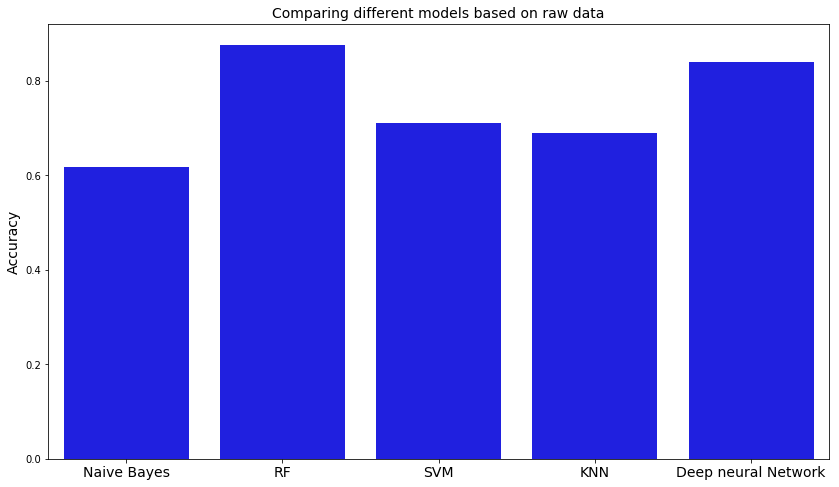

In [31]:
accuracy_raw = [0.617, 0.877, 0.71, 0.69, 0.84]

plot_accuracy(["Naive Bayes", "RF", "SVM", "KNN", "Deep neural Network"], accuracy_raw, "blue")
plt.ylabel("Accuracy", fontsize = 14)
plt.title("Comparing different models based on raw data", fontsize = 14);
#plt.savefig("acc_raw.png")

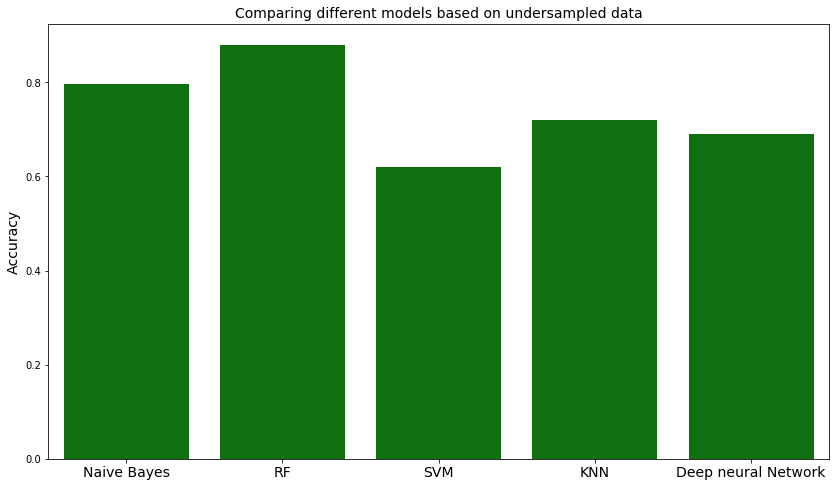

In [32]:
accuracy_undersampled =  [0.796, 0.88,0.62, 0.72, 0.69]
plot_accuracy(["Naive Bayes", "RF", "SVM", "KNN", "Deep neural Network"], accuracy_undersampled, 'green')
plt.ylabel("Accuracy", fontsize = 14)
plt.title("Comparing different models based on undersampled data", fontsize = 14);
#plt.savefig("acc_under.png")

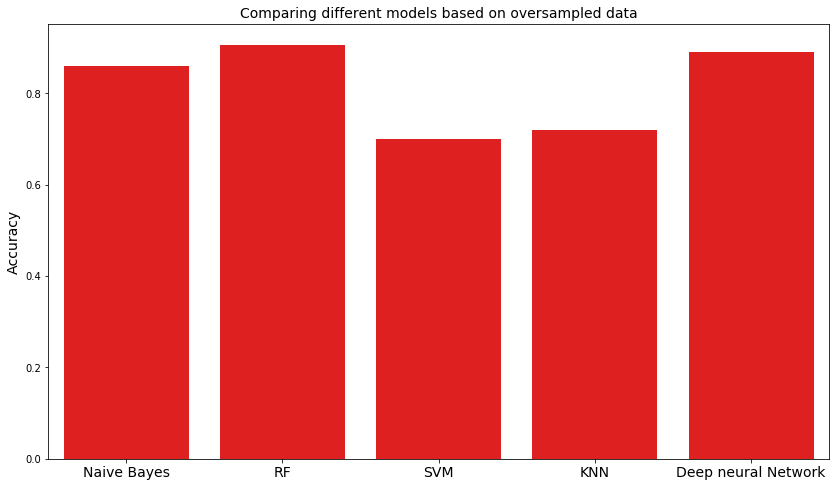

In [33]:
accuracy_smote =  [0.86, 0.907, 0.70, 0.72, 0.89]
plot_accuracy(["Naive Bayes", "RF", "SVM", "KNN", "Deep neural Network"], accuracy_smote, 'red')
plt.ylabel("Accuracy", fontsize = 14)
plt.title("Comparing different models based on oversampled data", fontsize = 14);
#plt.savefig("acc_over.png")

# 11. f1-score

In [34]:
def plot_f1(x1,y1, color):
    fig = plt.figure(figsize = (14,8))
    ax1 = sns.barplot(x1,y1, color = color)
    plt.xticks([0,1,2,3], fontsize = 14);

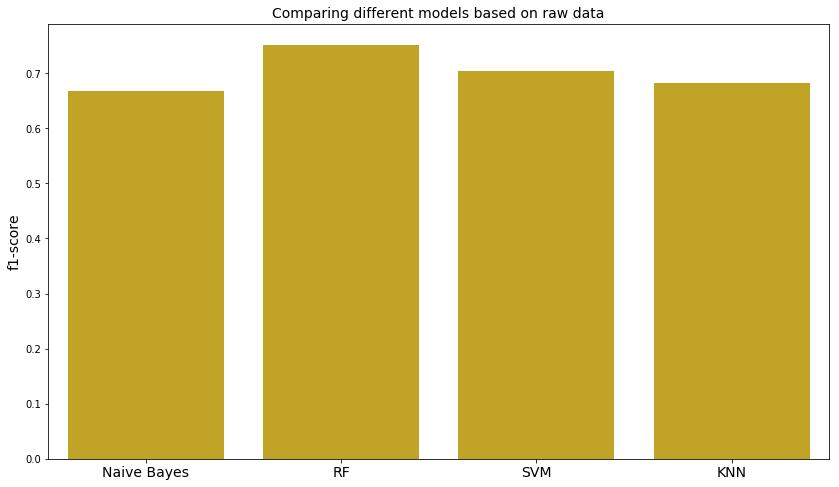

In [35]:
f1_score_raw = [0.667, 0.752, 0.704, 0.683]
plot_f1(["Naive Bayes", "RF", "SVM", "KNN"], f1_score_raw, 'xkcd:gold')
plt.ylabel("f1-score", fontsize = 14)
plt.title("Comparing different models based on raw data", fontsize = 14);
plt.savefig("f1_raw.png")

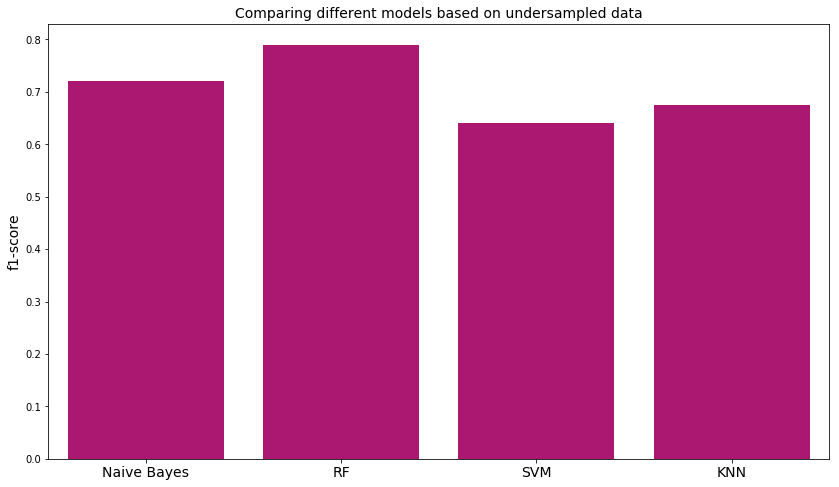

In [36]:
f1_score_undersampled = [0.72,0.79, 0.64, 0.674]
plot_f1(["Naive Bayes", "RF", "SVM", "KNN"], f1_score_undersampled, 'xkcd:magenta')
plt.ylabel("f1-score", fontsize = 14)
plt.title("Comparing different models based on undersampled data", fontsize = 14);
plt.savefig("f1_under.png")
# plot_accuracy_f1(["Naive Bayes", "RF", "SVM"], accuracy_undersampled, f1_score_undersampled, 3)

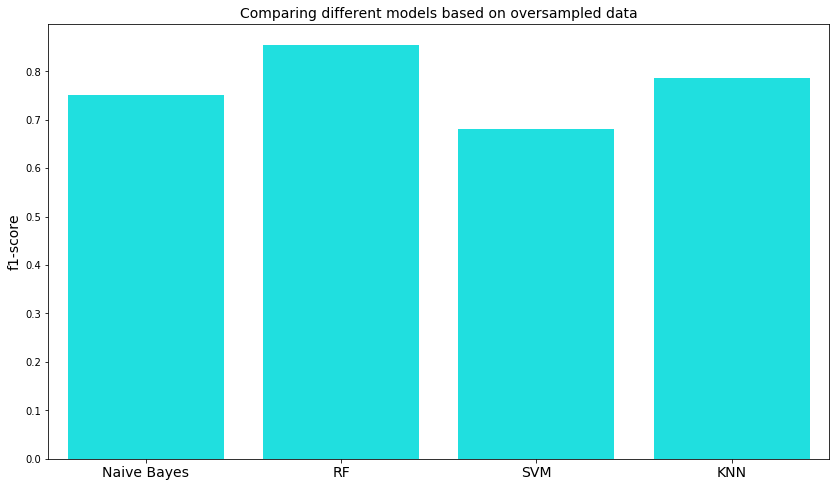

In [37]:
# accuracy_smote = [0.86, 0.907, 0.70]
f1_score_smote = [0.75, 0.855, 0.68, 0.786]
plot_f1(["Naive Bayes", "RF", "SVM", "KNN"], f1_score_smote, 'cyan')
plt.ylabel("f1-score", fontsize = 14)
plt.title("Comparing different models based on oversampled data", fontsize = 14);
plt.savefig("f1_over.png")

